# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.
El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | La danceabilidad describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos danceable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [120]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [121]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [122]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [124]:
df.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052

In [125]:
df.tail(5)

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre          playlist_subgenre  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
32828         0.428   0.922    2    -1.814     1       0.0936      0.076600   
32829         0.522   0.786    0    -4.462     1       0.0420      0.001710   
32830         0.529   0.821    6    -4.899     0       0.0481      0.108000   
32831         0.626   0.888    2    -3.361     1       0.1090      0.007920   
32832         0.603   0.884    5    -4.571     0       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  
32828          0.000000    0.0668   0.2100  128.170       204375  
32829          0.004270    0.3750   0.4000  128.041       353120  
32830          0.000001    0.1500   0.4360  127.989       210112  
32831          0.127000    0.3430   0.3080  128.008       367432  
32832          0.341000    0.7420   0.0894  127.984       337500

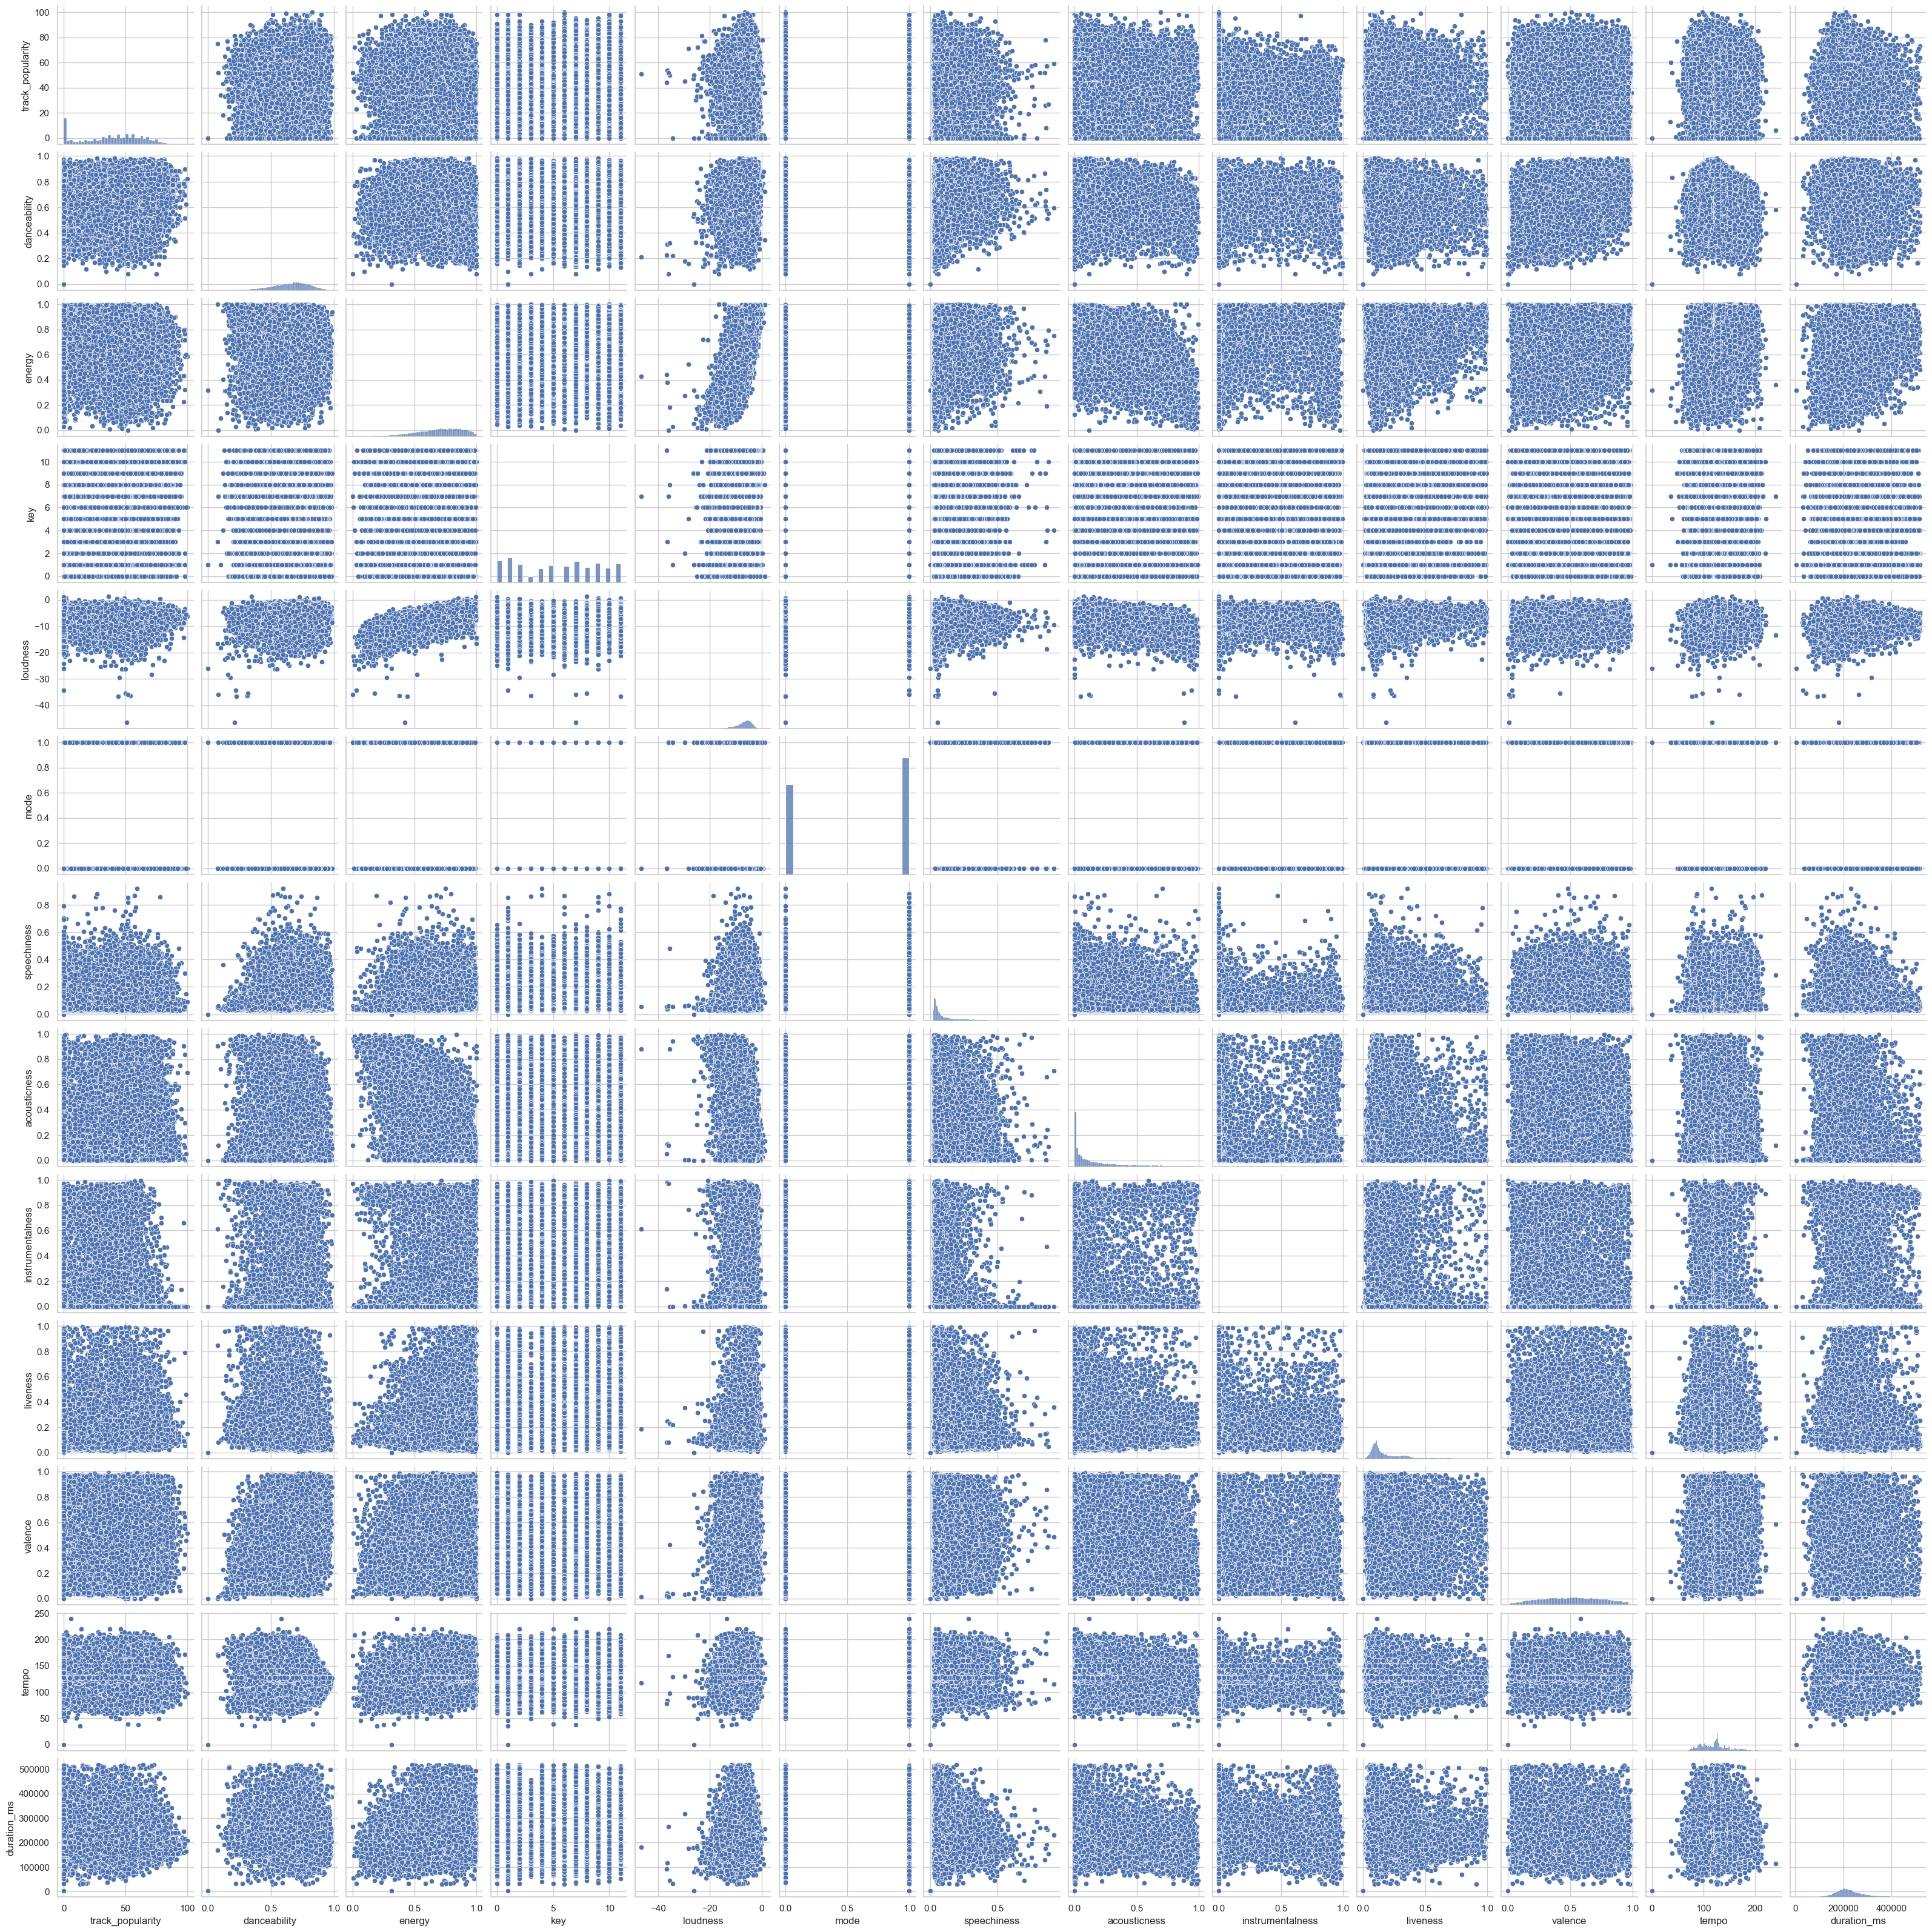

In [138]:
sns.pairplot(df)
plt.show()

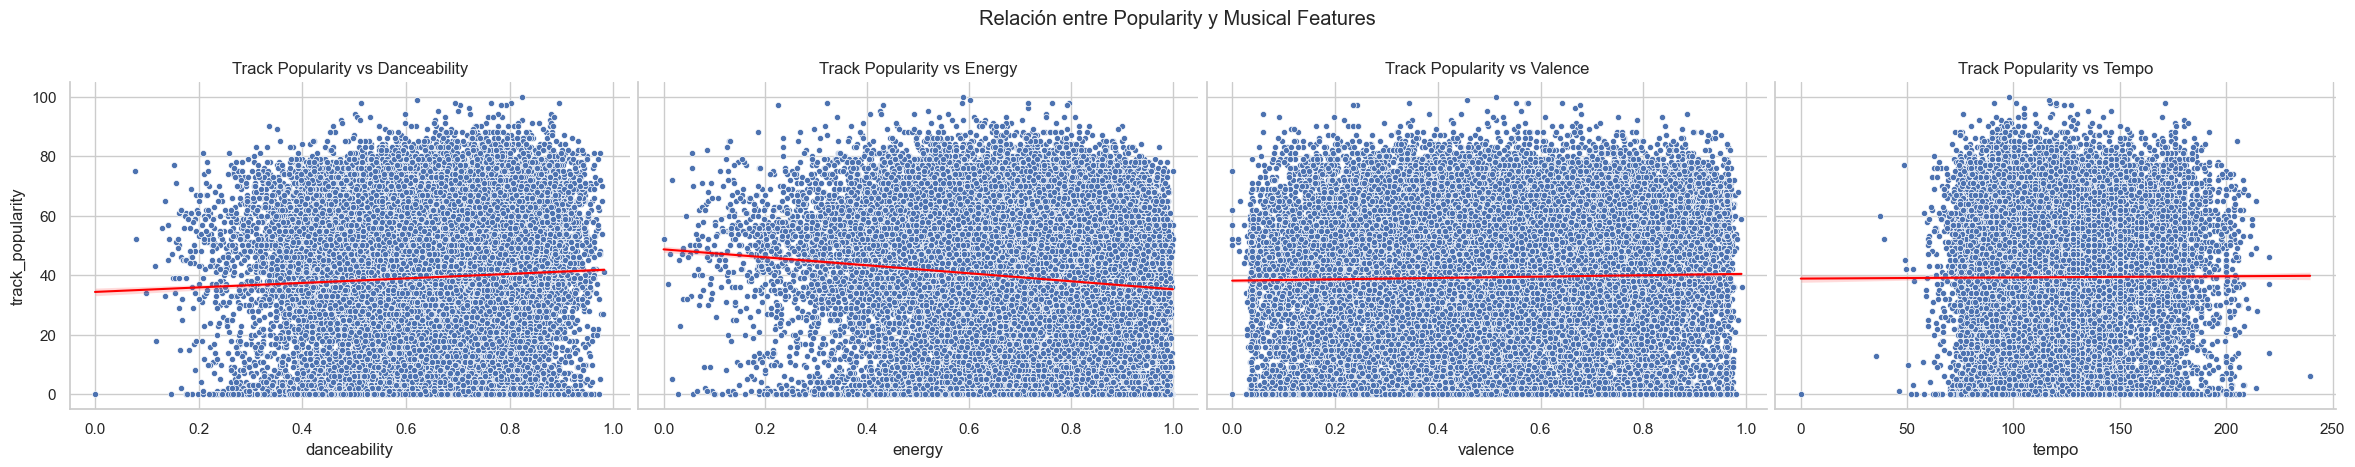

In [141]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

## Gráficos

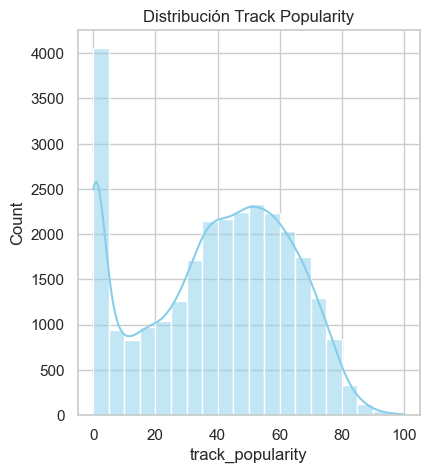

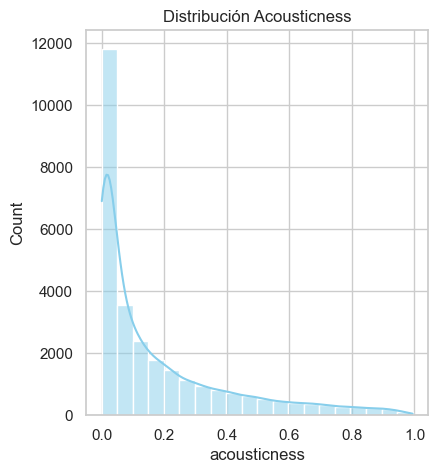

In [155]:
# Graficamos la distribución del campo track_popularity
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['track_popularity'], bins=20, kde=True, color="skyblue")
plt.title('Distribución Track Popularity')

# Graficamos la distribución del campo acousticness
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['acousticness'], bins=20, kde=True, color="skyblue")
plt.title('Distribución Acousticness')

plt.show()

<Axes: >

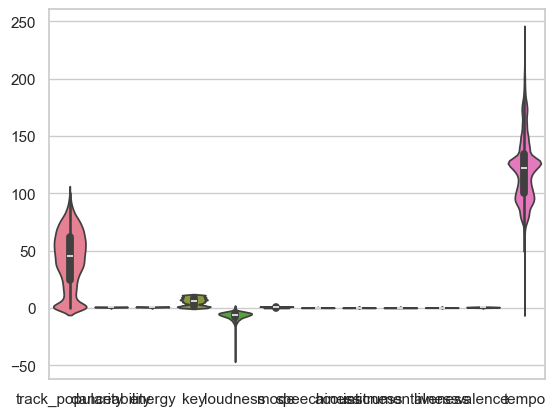

In [ ]:
sns.violinplot( data=df.drop(['duration_ms'],axis=1))

<Axes: >

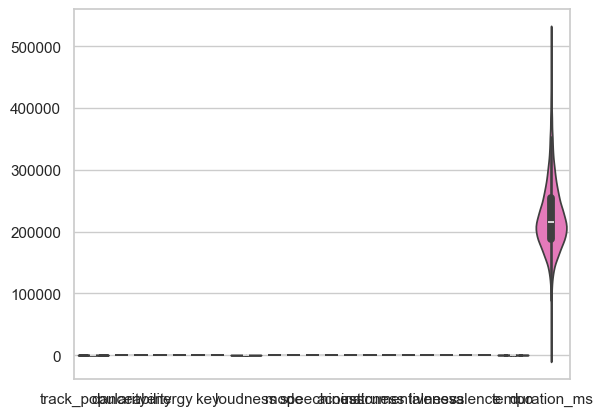

In [ ]:
sns.violinplot(df)

## Tratamiento de valores nulos

In [142]:
df.sample(5)

track_id  \
26859  1IdnTCh4GlzkjoceN6LVpQ   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
20442  6Wiyd7AsRdXvXGrxNkbqQ1   
6988   6EFCTbFDID2uGkWINtvqLL   
31951  4kHwYiQ6nDHgEBRSEdKLzH   

                                             track_name   track_artist  \
26859  Good Thing (feat. Kehlani) - Marc Benjamin Remix           Zedd   
32831                    Only For You - Maor Levi Remix         Mat Zo   
20442                                    Stupid In Love        Rihanna   
6988                                              Lausd     Jurassic 5   
31951                              Housetrap - Original  Laidback Luke   

       track_popularity          track_album_id  \
26859                50  6OPRsAMMOah7euti7cEFay   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
20442                47  7uGmyYwDFJbSc1xs4hkEs2   
6988                 25  6I4sWoNs2IlWUyMmJ7VDFw   
31951                 0  0eBMCOzTbRQASUVTcOX0jf   

                          track_album_name track_album_release_date  \
26859  Good Thing (with Kehlani) [Remixes]               2020-01-03   
32831               Only For You (Remixes)               2014-01-01   
20442                              Rated R               2009-11-20   
6988                       Quality Control               2000-01-01   
31951         Housetrap / We Rock Da House               2008-08-07   

                            playlist_name             playlist_id  \
26859            Electro House Top Tracks  1G0q0NK7g3C0XerNqq7GbL   
32831                     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
20442                       Pop 2009-2011  3gV6KQYZKIuoWml0094vx6   
6988   Southern California Hip Hop Primer  206vi9Q0p3juAU73flxPsz   
31951      Electro/Progressive/Club House  1HtnPDj2V126xB9tJP786P   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
26859            edm              electro house         0.494   0.817    1   
32831            edm  progressive electro house         0.626   0.888    2   
20442          latin              latin hip hop         0.738   0.562    0   
6988             rap           southern hip hop         0.925   0.775   10   
31951            edm  progressive electro house         0.715   0.569    0   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
26859    -7.631     0       0.1750       0.10500           0.00217     0.207   
32831    -3.361     1       0.1090       0.00792           0.12700     0.343   
20442    -5.435     0       0.0347       0.63300           0.00000     0.102   
6988     -6.470     0       0.2230       0.15800           0.00000     0.658   
31951    -8.492     1       0.0571       0.10600           0.83900     0.273   

       valence    tempo  duration_ms  
26859    0.187  127.915       225000  
32831    0.308  128.008       367432  
20442    0.476  127.452       241440  
6988     0.724   94.748       247907  
31951    0.556  127.008       461107

In [143]:
# vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id            0
track_name          4
track_artist        4
track_popularity    0
track_album_id      0
                   ..
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Length: 23, dtype: int64

In [144]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
8151   southern hip hop         0.714   0.821    6    -7.635     1   
9282       gangster rap         0.678   0.659   11    -5.364     0   
9283       gangster rap         0.465   0.820   10    -5.907     0   
19568         reggaeton         0.675   0.919   11    -6.075     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
8151        0.1760        0.0410           0.00000    0.1160    0.649   
9282        0.3190        0.0534           0.00000    0.5530    0.191   
9283        0.3070        0.0963           0.00000    0.0888    0.505   
19568       0.0366        0.0606           0.00653    0.1030    0.726   

         tempo  duration_ms  
8151    95.999       282707  
9282   146.153       202235  
9283    86.839       206465  
19568   97.017       252773

In [145]:
# filtramos los campos donde track_popularity es 0 
df_filtered = df[df['track_popularity'] == 0]
df_filtered

track_id  \
476    1gsb4CFzUMERAkfzAKwrZu   
772    4yEXem27DzCg8xytvvO3E9   
801    7vHkU1H73z5NVbGTIyI1DG   
883    3decfgk2pFkvCzYUFj6ssf   
934    5KHbu2Go6NBryS0h0TpTNJ   
...                       ...   
32800  5yl2YyDgcpERTZoZHD9Etl   
32810  0ZAPuWOQiiY0nGbLPlozT8   
32813  5sYzg83Vy4IW4TfE9jwk8g   
32821  3fgNmvYq0QU5aFHDUMa4cm   
32822  00UpV14MDfk4CvrMbFvqji   

                                              track_name         track_artist  \
476                                                Siren                SUNMI   
772                                  Lollipop (Candyman)                 Aqua   
801                                     Around The World                 Aqua   
883                                            I'm Yours  Influencers Worship   
934                                        Talk About It              Bancali   
...                                                  ...                  ...   
32800                                           Dynamite         Gareth Emery   
32810                        Lights & Thunder - Club Mix         Gareth Emery   
32813                            Invincible - Radio Edit             Borgeous   
32821  Unleash (Life In Color Anthem 2014) - Original...       Adventure Club   
32822  It Won't Stop (feat. Chris Brown) - Julian Cal...       Sevyn Streeter   

       track_popularity          track_album_id             track_album_name  \
476                   0  75eIP5pPvtQCB0bAz2TEsU                      WARNING   
772                   0  2vb252Haz9iX4iOd7vP8kX                Greatest Hits   
801                   0  2vb252Haz9iX4iOd7vP8kX                Greatest Hits   
883                   0  2FQCn5R6hSDeGYgUCW5kN9                    I'm Yours   
934                   0  5aBI1WNIur9niQ5dM6xnVB                Talk About It   
...                 ...                     ...                          ...   
32800                 0  3Zm13AWIMBpJbwFzenqy9V                        Drive   
32810                 0  6yHi6saMH67HPD59a6arK1             Lights & Thunder   
32813                 0  3NArAQULJ5BMoR8YY5UdWA                   Invincible   
32821                 0  4qzYTF7mwcWMbEFdw5qcHB                      Unleash   
32822                 0  52FeJmVsUJfoQybiwI5j9m  Atlantic Records Miami 2014   

      track_album_release_date          playlist_name             playlist_id  \
476                 2018-09-26      K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   
772                 2009-01-01         90s Dance Hits  50cXvxgMGrvoUeLhkzCyIO   
801                 2009-01-01         90s Dance Hits  50cXvxgMGrvoUeLhkzCyIO   
883                 2018-07-06  Christian Dance Party  37i9dQZF1DWUUPO0Sbx2CM   
934                 2018-01-17         Pop Dance Hits  7eERKCkgNKCCx5GYdeMIZf   
...                        ...                    ...                     ...   
32800               2014-04-01        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32810               2014-03-31        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32813               2014-02-03        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32821               2014-04-16        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32822               2014-04-01        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
476              pop                  dance pop         0.605   0.894    9   
772              pop                  dance pop         0.716   0.981    0   
801              pop                  dance pop         0.705   0.975    6   
883              pop                  dance pop         0.559   0.844   11   
934              pop                  dance pop         0.498   0.723    7   
...              ...                        ...           ...     ...  ...   
32800            edm  progressive electro house         0.576   0.693    5   
32810            edm  progressive electro house         0.599   0.894    5   
32813          

## Tratamiento de duplicados

In [146]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


In [147]:
# Tratamiento de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')
df

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                  dance pop         0.748   0.916    6   
1                pop                  dance pop         0.726   0.815   11   
2                pop                  dance pop         0.675   0.931    1   
3                pop                  dance pop         0.718   0.930    7   
4                pop                  dance pop         0.650 

In [148]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


## …

## Tratamiento de outliers

### Por tempo

In [149]:
# Eliminamos las canciones con duración menor a 30 seg por no considerarlas representativas
zerotempo_counts = df['tempo'] == 0
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 28356, dtype: bool


1

### Por duración

In [150]:
# Eliminamos las canciones con duración menor a 30 seg por no considerarlas representativas
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 28356, dtype: bool


2

In [151]:
# Tratamiento de outliers
df = df[df['duration_ms'] > 30000]

In [152]:
# Verificación
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 28354, dtype: bool


0

Verificamos que quedan eliminados los outliers por duración y tempo.

### Otras

In [163]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Get the rows with the maximum value in 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

track_id track_name track_artist  track_popularity  \
25705  5ZbJR1AfdOsvsYNuCvgqKX   I'M DEAD     Duckwrth                59   

               track_album_id track_album_name track_album_release_date  \
25705  1JqHKxNhfBv3ZIz1VwhENp        I'M UUGLY               2016-09-23   

                     playlist_name             playlist_id playlist_genre  \
25705  Groovy // Funky // Neo-Soul  0JmBB9HfrzDiZoPVRdv8ns            r&b   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
25705          neo soul         0.593   0.751    4    -9.414     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
25705        0.918         0.707               0.0     0.356    0.485   

         tempo  duration_ms  
25705  114.907       230632

In [168]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Get the rows with the maximum value in 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

track_id            track_name track_artist  \
14216  3ttzGcgmxvD8iGyb3NEZVr  Scentless Apprentice      Nirvana   

       track_popularity          track_album_id  \
14216                 0  4HACR8HgOYj1HH4vCZ3MVi   

                           track_album_name track_album_release_date  \
14216  In Utero - 20th Anniversary Remaster               1993-09-21   

           playlist_name             playlist_id playlist_genre  \
14216  keg party jukebox  4PjiT7SWnUsTTTvKOuR76f           rock   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
14216    permanent wave          0.32   0.833    1    -8.498     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
14216       0.0478      0.000001             0.123      0.14    0.573   

         tempo  duration_ms  
14216  169.226       228053

In [169]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Get the rows with the maximum value in 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
4      1e8PAfcKUYoKkxPhrHqw4x   
5      7fvUMiyapMsRRxr07cU8Ef   
6      2OAylPUDDfwRGfe0lYqlCQ   
9      1IXGILkPm0tOCNeq00kCPa   
...                       ...   
32802  3Gwq0zKnMWluOEPKh93BeC   
32811  353JGhRW6ahVU3DpCxOjqW   
32813  5sYzg83Vy4IW4TfE9jwk8g   
32827  0aBDrRTgDCwWbcOnEIp7DJ   
32828  7bxnKAamR3snQ1VGLuVfC1   

                                              track_name  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   
4                Someone You Loved - Future Humans Remix   
5      Beautiful People (feat. Khalid) - Jack Wins Remix   
6                        Never Really Over - R3HAB Remix   
9                    If I Can't Have You - Gryffin Remix   
...                                                  ...   
32802                                        Lost At Sea   
32811                                Utopia - Radio Edit   
32813                            Invincible - Radio Edit   
32827                             Many Ways - Radio Edit   
32828               City Of Lights - Official Radio Edit   

                              track_artist  track_popularity  \
0                               Ed Sheeran                66   
4                            Lewis Capaldi                69   
5                               Ed Sheeran                67   
6                               Katy Perry                62   
9                             Shawn Mendes                67   
...                                    ...               ...   
32802                                 Zedd                51   
32811                              Qubicon                11   
32813                             Borgeous                 0   
32827  Ferry Corsten feat. Jenny Wahlstrom                27   
32828                         Lush & Simon                42   

               track_album_id  \
0      2oCs0DGTsRO98Gh5ZSl2Cx   
4      7m7vv9wlQ4i0LFuJiE2zsQ   
5      2yiy9cd2QktrNvWC2EUi0k   
6      7INHYSeusaFlyrHSNxm8qH   
9      4QxzbfSsVryEQwvPFEV5Iu   
...                       ...   
32802  7juWTdmjo0vYywWu8HiQxs   
32811  466ziBbv68mP56uJom8uSL   
32813  3NArAQULJ5BMoR8YY5UdWA   
32827  59XOfNjuYZB6feC6QUzS3e   
32828  2azRoBBWEEEYhqV6sb7JrT   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
4                Someone You Loved (Future Humans Remix)   
5      Beautiful People (feat. Khalid) [Jack Wins Remix]   
6                        Never Really Over (R3HAB Remix)   
9                    If I Can't Have You (Gryffin Remix)   
...                                                  ...   
32802                                            Clarity   
32811                                             Utopia   
32813                                         Invincible   
32827                                          Many Ways   
32828                         City Of Lights (Vocal Mix)   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
5                   2019-07-11        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
6                   2019-07-26        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
9                   2019-06-20        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32802               2012-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32811               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32813               2014-02-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32827                     2013  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                 

In [174]:
# Liveness
max_liveness = df['liveness'].max()

# Get the rows with the maximum value in 'acousticness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

track_id  \
11296  2da7wnI5OoV89TsdKMM81k   

                                              track_name   track_artist  \
11296  Knockin' On Heaven's Door - Live In London / 1992  Guns N' Roses   

       track_popularity          track_album_id  track_album_name  \
11296                50  3ZwjaVcnVo2TwhK8N8WWVs  Live Era '87-'93   

      track_album_release_date          playlist_name             playlist_id  \
11296               1999-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11296           rock        album rock         0.271   0.891    6    -6.011   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11296     1       0.0824       0.00188            0.0157     0.996    0.365   

         tempo  duration_ms  
11296  147.509       447160

In [176]:
# Valence
max_valence = df['valence'].min()

# Get the rows with the maximum value in 'acousticness'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

track_id                            track_name  \
17002  1Ksf0moFKGhOJ6uNgQcEAT                  Nightfall by the Sea   
17004  5CwOUooch74h0XarhDfAQK  Rain Forest and Tropical Beach Sound   
17009  37TdJ5EWlM9Jfw8IqiUHcm          Chill Waves & Wind in Leaves   
17012  7a3eLJPSgAk3PQbpYjrYdM                           Summer Rain   
17014  6ADPydLM8fmi6fjO9ZXAb8                           Forest Rain   

                     track_artist  track_popularity          track_album_id  \
17002                      Shaman                50  27CDKjjwubPm4ZAQVNqsPq   
17004  Nature Sounds Nature Music                52  3snlIBZinyiVAFjV6GCeoY   
17009                Pinetree Way                57  4UvRUxM8fwrChyFg0fglnz   
17012              Rain Sounds FX                62  089nbe8JjcObU0nej5hJKb   
17014             Rain Recordings                75  4DlF8SX13AdB37uKVgMziM   

                                        track_album_name  \
17002                         3D Audio Textures of Waves   
17004  Nature Sounds - Nature Music for Sleep, Yoga a...   
17009                                              Waves   
17012                                        Summer Rain   
17014                           Peaceful Rain Recordings   

      track_album_release_date    playlist_name             playlist_id  \
17002               2019-09-12  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17004               2011-02-16  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17009               2019-10-03  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17012               2019-10-03  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17014               2019-09-06  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
17002          latin          tropical        0.2280   0.999    6   -16.145   
17004          latin          tropical        0.1600   1.000    5   -16.449   
17009          latin          tropical        0.1410   1.000   10   -14.729   
17012          latin          tropical        0.1660   0.716    5   -20.684   
17014          latin          tropical        0.0771   1.000    3   -16.540   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
17002     0       0.0562         0.470             0.924     0.852  0.00001   
17004     0       0.0458         0.854             0.974     0.963  0.00001   
17009     0       0.1170         0.594             0.994     0.571  0.00001   
17012     1       0.0583         0.146             0.994     0.416  0.00001   
17014     0       0.0508         0.902             0.613     0.845  0.00001   

         tempo  duration_ms  
17002  108.354       177485  
17004  130.674       240000  
17009  102.045       241375  
17012   61.616       152884  
17014  171.623       170000

In [181]:
top_10 = df.sort_values(by='valence', ascending=False).tail(10)

print(top_10)

                     track_id                            track_name  \
17013  0rtT2DmXIcwqpcXVrX6C7V                Suburban Forest Rain 2   
17011  0XhxyzxCoJ15QH3J4HnCfW                Caribbean Thunderstorm   
17015  7oOeB6z1yHE3LTlZjJ5XJ9                 Gentle Waves on Rocks   
17010  28ilcqErfNjitJ7T3byHoX                       Peaceful Forest   
17018  5iAB4tlYseBES4MKqgY4KG       Relaxing Crickets And Waterfall   
17014  6ADPydLM8fmi6fjO9ZXAb8                           Forest Rain   
17004  5CwOUooch74h0XarhDfAQK  Rain Forest and Tropical Beach Sound   
17002  1Ksf0moFKGhOJ6uNgQcEAT                  Nightfall by the Sea   
17009  37TdJ5EWlM9Jfw8IqiUHcm          Chill Waves & Wind in Leaves   
17012  7a3eLJPSgAk3PQbpYjrYdM                           Summer Rain   

                     track_artist  track_popularity          track_album_id  \
17013                    Aquagirl                57  4f7VQq5S72LpVOV1bu08Tt   
17011      Mother Nature Sound FX                65  47aFId4

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | La danceabilidad describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos danceable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas, ruidosas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


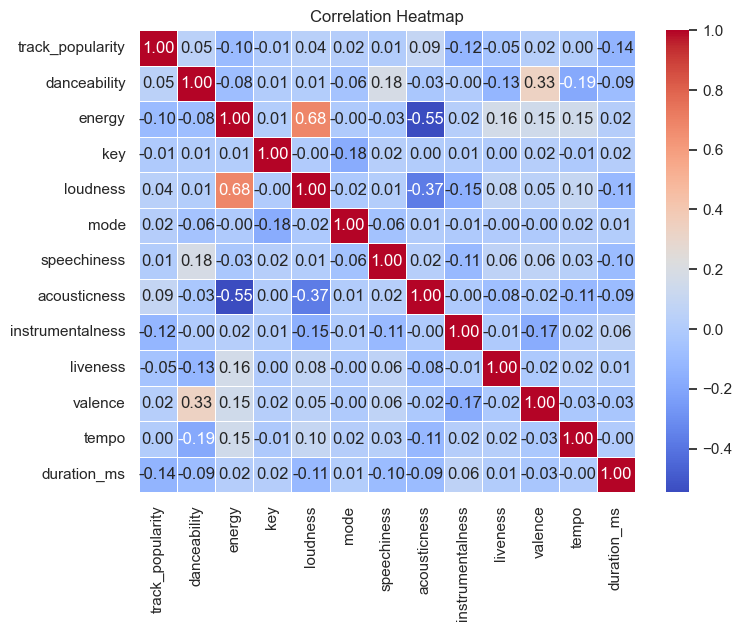

In [177]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()